Importing Necessary Libraries


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

Importing the dataset and Displaying the first 5 rows

In [3]:
df=pd.read_csv("/content/Ice Cream.csv")
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [25]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


Checking Null Value for Temperature Column

In [7]:
sum(df['Temperature']==0)

1

Checking Null Value for Revenue Column

In [9]:
df['Revenue'].isnull().sum()

np.int64(0)

Plotting Graph to View the Outliers

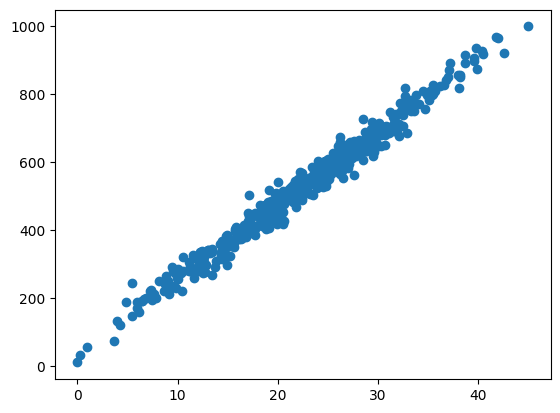

In [12]:
pl.scatter(df['Temperature'],df['Revenue'])
pl.show()

HeatMap

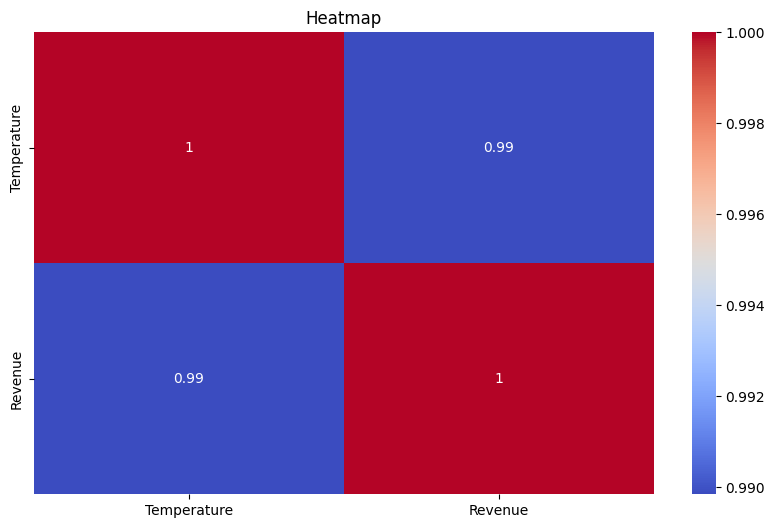

In [31]:
pl.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
pl.title('Heatmap')
pl.show()

Replacing all the Temperature less than 5 with mean value

In [38]:
mean_temp=df['Temperature'].mean()
df.loc[df['Temperature'] < 5, 'Temperature'] = mean_temp

In [39]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,23.451499,522.058000
std,6.764775,175.410399
min,10.000000,10.000000
25%,18.900000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


Importing Model using Scikit Learn

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Spliting the data into test and train

In [42]:
x=df['Temperature']
y=df['Revenue']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Shape of testing and training data

In [123]:
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 1)
(100, 1)
(400, 1)
(100, 1)


Linear Regression model

In [124]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Predicting the Input

In [127]:
input=36;
prediction=model.predict([[input]])
print("Revenue for Temperature",input,"is",prediction)

Revenue for Temperature 36 is [[799.09932806]]


Accuracy and RMSE of the Model

In [129]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(x_test)
accuracy = model.score(x_test, y_test)
print(f"Accuracy: {accuracy*100}")
rmse=mean_squared_error(y_test,y_pred)
print("RMSE:",rmse)

Accuracy: 66.90519894169877
RMSE: 9450.788977785294
